In [46]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv('/Users/ernestng/Desktop/projects/datasci_salary/explored_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company', 'job_loc', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'matlab', 'tableau', 'sql', 'mongodb', 'stats',
       'apache', 'hadoop', 'rank', 'job', 'num_comp', 'clean_desc', 'desc_len',
       'token_desc'],
      dtype='object')

In [4]:
for_model = ['Rating', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'avg_salary', 'job_loc', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'matlab', 'tableau', 'sql', 'mongodb', 'stats',
       'apache', 'hadoop', 'rank', 'job', 'num_comp', 'desc_len']
df_model = df[for_model]

In [5]:
new_df = pd.get_dummies(df_model)
new_df

,Rating,hourly,employer_provided,avg_salary,same_state,age,python,r_studio,spark,aws,...,rank_junior,rank_na,rank_senior,job_analyst,job_data engineer,job_data scientist,job_director,job_machine learning,job_manager,job_na
0,3.8,0,0,72.0,0,47,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,3.4,0,0,87.5,0,36,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,4.8,0,0,85.0,1,10,1,1,1,0,...,0,1,0,0,0,1,0,0,0,0
3,3.8,0,0,76.5,1,55,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,2.9,0,0,114.5,1,22,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,0,0,84.5,0,190,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
738,4.4,0,0,102.5,0,14,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
739,2.6,0,0,73.5,1,36,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
740,3.2,0,0,127.5,0,-1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


### Multiple Linear Regression

In [6]:
from sklearn.model_selection import train_test_split
x = new_df.drop('avg_salary', axis=1)
y = new_df.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
import statsmodels.api as sm
X_sm = sm.add_constant(x)
model = sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     5.193
Date:                Sun, 17 May 2020   Prob (F-statistic):           9.99e-48
Time:                        20:41:16   Log-Likelihood:                -3427.1
No. Observations:                 742   AIC:                             7158.
Df Residuals:                     590   BIC:                             7859.
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                33.2060      8.512      3.901      0.000      16.488      49.924
Rating                                                6.1318      2.327      2.635      0.009       1.561      10.702
hourly                                              -34.4336     11.099     -3.102      0.002     -56.232     -12.635
employer_provided                                    45.8102     13.661      3.353      0.001      18.980      72.641
same_state                                            5.9492      3.180      1.871      0.062      -0.296      12.195
age                                                   0.0107      0.036      0.295      0.768      -0.061       0.082
python                                               12.6600      3.288      3.851      0.000       6.203      19.117
r_studio                                             -2.1208      3.843     -0.552      0.581      -9.668       5.426
spark                                                -5.1979      3.936     -1.320      0.187     -12.929       2.533
aws                                                   5.4242      3.276      1.656      0.098      -1.010      11.858
excel                                                -6.3683      2.709     -2.351      0.019     -11.689      -1.048
matlab                                               12.4662      5.145      2.423      0.016       2.361      22.571
tableau                                              -6.6800      3.595     -1.858      0.064     -13.740       0.380
sql                                                  -7.1229      3.186     -2.235      0.026     -13.381      -0.865
mongodb                                              13.1290      6.572      1.998      0.046       0.221      26.037
stats                                                 6.9130      2.921      2.366      0.018       1.175      12.651
apache                                                7.7342      5.842      1.324      0.186      -3.739      19.207
hadoop                                                2.1237      4.171      0.509      0.611      -6.069      10.316
num_comp                                              2.8725      1.054      2.725      0.007       0.802       4.942
desc_len                                             -0.0056      0.006     -0.868      0.386      -0.018       0.007
Size_-1                                               5.2819     10.173      0.519      0.604     -14.699      25.262
Size_1 to 50 employees                                2.3854      7.682      0.311      0.756     -12.702      17.473
Size_10000+ employees                                 1.9043      6.848      0.278      0.781     -11.545      15.354
Size_1001 to 50

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv = 3))

-26.623385199494294

### Lasso Regression

In [9]:
from sklearn.linear_model import Lasso

alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    clf = Lasso(alpha=(i/100))
    clf.fit(X_train, y_train)
    err = np.mean(cross_val_score(clf, X_train, y_train, scoring='neg_mean_absolute_error', cv = 3))
    error.append(err)
    

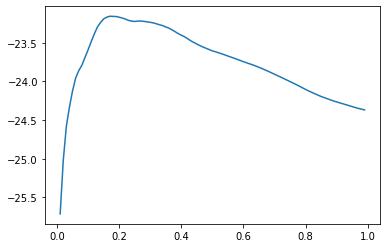

In [12]:
import matplotlib.pyplot as plt
plt.plot(alpha,error)

In [14]:
err = tuple(zip(alpha,error))
error_df = pd.DataFrame(err, columns=['alpha', 'error'])
error_df[error_df['error'] == max(error_df['error'])]

,alpha,error
16,0.17,-23.157108


In [15]:
clf = Lasso(alpha=0.17)
clf.fit(X_train, y_train)
np.mean(cross_val_score(clf, X_train, y_train, scoring='neg_mean_absolute_error', cv = 3))

-23.15710836725003

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv = 3))

-17.454930478729768

### Tuning model with GridsearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
#tune number of estimators(trees)
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse', 'mae'), 'max_features':('auto', 'sqrt', 'log2')}

gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv = 3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [25]:
gs.best_score_ #slight improvement with gridsearchcv

-17.167601826913963

In [26]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Test ensembles

In [42]:
mlr_pred = lm.predict(X_test)
lasso_pred = clf.predict(X_test)
rf_pred = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, mlr_pred) #looks bad, predictive power is super weak. I might have made a mistake here

195386123.57225892

In [43]:
mean_absolute_error(y_test, lasso_pred)

24.790363805671245

In [44]:
mean_absolute_error(y_test, rf_pred) #random forest appears to have the best score and this is expected since rf performs well even with multicollinearity in the data

13.929334228187919

### Production

In [61]:
pickl = {'model': gs.best_estimator_}
pickle.dump(pickl, open('model_file'+'.p','wb'))

In [62]:
file_name = 'model_file.p'
with open(file_name,'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [63]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

array([52.03181818])

In [65]:
X_test.iloc[1,:]

Rating                   3.6
hourly                   0.0
employer_provided        0.0
same_state               1.0
age                     34.0
                        ... 
job_data scientist       0.0
job_director             0.0
job_machine learning     0.0
job_manager              0.0
job_na                   0.0
Name: 196, Length: 186, dtype: float64